# Naive Bayes Classification
나이브 베이즈 분류는 베이즈 정리에 기반한 **통계적 분류 기법**이다. 가장 단순한 지도 학습 (supervised learning) 중 하나이다.

나이브 베이즈는 feature끼리 **서로 독립**이라는 **조건이 필요**하다.

예를 들어, 스펨 메일 분류에서 광고성 단어의 개수와 비속어의 개수가 서로 연관이 있어서는 안 된다.

예로 나이브 베이즈를 알아보자.


### **- Feature가 하나일 때 나이브 베이즈 분류**
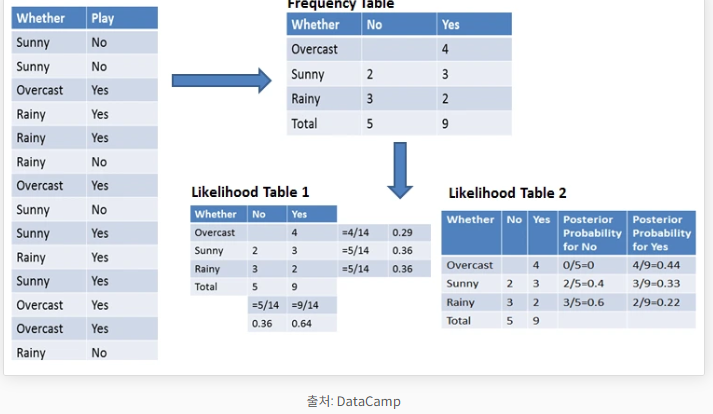

문제 1.

날씨가 overcast일 때 경기를 할 확률은?
P(Yes|Overcast) = P(Overcast|Yes) P(Yes) / P(Overcast)   <- 베이즈 정리 공식

1. 사전 확률

P(Overcast) = 4/14 = 0.29

P(Yes) = 9/14 = 0.64

2. 사후 확률

P(Overcast|Yes) = 4/9 = 0.44

3. 베이즈 정리 공식에 대입

P(Yes|Overcast) = P(Overcast|Yes) P(Yes) / P(Overcast) = 0.44 * 0.64 / 0.29 = 0.98

즉, 날씨가 Overcast일 때 축구를 할 확률이 0.98이라는 뜻입니다.





- Problem

  sklearn 라이브러리에 있는 wine 데이터셋을 이용하여 나이브 베이즈 분류기를 학습시키고 와인을 3가지 클래스로 분류해보자.

- Result

  91퍼센트의 정확도를 보여주었다.

### **1. 데이터셋 불러오기 & 데이터 전처리**

In [14]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()

print(type(wine))
print(wine.keys())
print(wine.data)
print(wine.feature_names)
print(wine.target)
print(wine.target_names)
print(wine.frame)

wine_feature = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_label = pd.DataFrame(wine.target)


<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


### **2. 훈련용/ 시험용 데이터셋 분리**

In [15]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(wine_feature, wine_label)

### **3. 데이터 정규화**

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

print(train_X, train_Y)

[[-1.89326939  1.18189741 -2.31417702 ... -0.87431582  0.29744777
  -0.58008258]
 [-1.13914421 -0.92812585 -0.29866459 ...  0.51747357  0.85918798
  -0.38229175]
 [ 0.5758824   1.05056816 -0.76055286 ... -0.61335531 -1.09285924
  -0.52357091]
 ...
 [ 1.67058023 -0.45534056  0.33118304 ...  0.30000648  1.37879767
   1.70550038]
 [ 0.04069679  1.2869608  -0.21468491 ... -0.48287505 -0.82603264
  -0.72764082]
 [-0.78640824 -0.66546735 -0.29866459 ... -0.26540796  0.25531726
  -1.27078072]]      0
110  1
89   1
138  2
77   1
174  2
..  ..
82   1
58   0
6    0
83   1
128  1

[133 rows x 1 columns]


### **4. 모델 생성 및 학습 / 예측**

In [17]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB() # 2차원으로 줄임
GNB.fit(train_X, train_Y)

predict_Y = GNB.predict(test_X)
print("Predict: ",predict_Y)
print("Score: ",GNB.score(test_X, test_Y))

Predict:  [1 1 1 1 0 1 2 2 1 1 0 2 1 2 2 2 0 1 0 2 0 1 1 1 0 2 0 1 1 0 1 1 0 1 2 1 2
 1 1 1 1 0 0 0 0]
Score:  0.9111111111111111


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


참조 할 것: https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-1%EB%82%98%EC%9D%B4%EB%B8%8C-%EB%B2%A0%EC%9D%B4%EC%A6%88-%EB%B6%84%EB%A5%98-Naive-Bayes-Classification